In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing data
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

##### In this project, I will be employing regression techniques within supervised learning to predict medical insurance costs

### Performing Explotary Data Analysis

In [7]:
#Showing first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#Showing bottom 5 rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
data.shape

(1338, 7)

##### This dataset comprises 1338 rows and 7 columns, including the following features: 
##### -age (age of the person), 
##### -sex (gender of the person), 
##### -bmi (Body Mass Index),
##### -children (number of children for the person), 
##### -smoker (smoking status of the person),
##### -region (region of the person in the US),
##### -charges (medical insurance costs per year for the person).

In [10]:
#Showing information abouts columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### From the information above, we can observe that:
##### - The columns 'age' and 'children' have an integer data type.
##### - The columns 'sex', 'smoker', and 'region' have an object data type.
##### - The columns 'bmi' and 'charges' have a float data type

In [11]:
#Checking uniques from each columns
for i in data.columns:
    print(i)
    print(data[i].unique(),'\n')

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39] 

sex
['female' 'male'] 

bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.76

##### No white space is present in columns 

In [12]:
#checking number of duplicate values
data.duplicated().sum()

1

In [13]:
#showing duplicated values 
duplicate_values=data[data.duplicated()]
duplicate_values

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


##### We can observe that there is 1 duplicate value present at index 581

In [14]:
#Droping duplicate values 
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(1337, 7)

##### After removing duplicate values, the dataset contains 1337 rows and 7 columns.

In [16]:
#Checcking null values 
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
#show statistical Summary of numerical columns 
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


###### From above statistical summary we can observe that
###### -There are no null values are present in columns
###### - There is a difference between the 75th percentile and the maximum values, which means that there are outliers present

#### Performing Encoding

In [18]:
#### Importing label Encoder
from sklearn.preprocessing import LabelEncoder

In [19]:
labelencoder=LabelEncoder()
list=['sex','smoker','region']
for column in list:
    data[column]=labelencoder.fit_transform(data[column])

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


###### With the help of the encoder, we have transformed categorical variables (strings) into numerical representations 

#### Cheking The Outliers

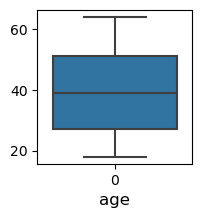

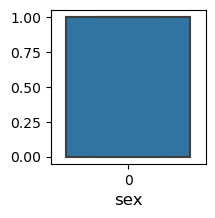

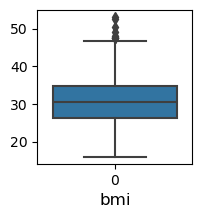

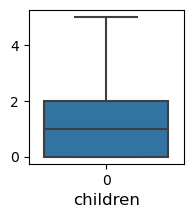

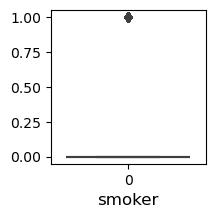

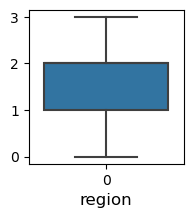

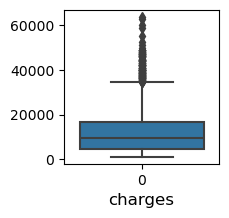

In [24]:
list=['age','sex','bmi','children','smoker','region','charges']
k=1
for columns in list:
    plt.figure(figsize=(2,2))
    if k<8:
        sns.boxplot(data[columns])
        plt.xlabel(columns,fontsize=12)
        k+=1
        plt.show()  

In [28]:
#Removing Outliers
from scipy.stats import zscore
independent=data.iloc[:,0:-1]
z=np.abs(zscore(independent))
np.where(z>3)
new_data=data[(z<3).all(axis=1)]

#### Visualization

<Axes: xlabel='age', ylabel='charges'>

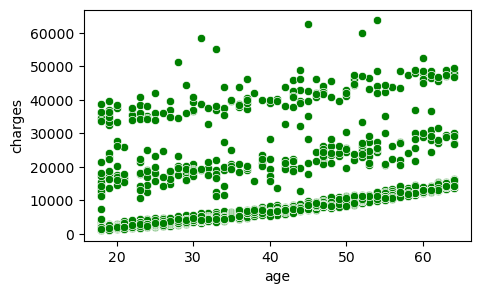

In [49]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=new_data,x='age',y='charges',color='green')

<Axes: xlabel='sex', ylabel='charges'>

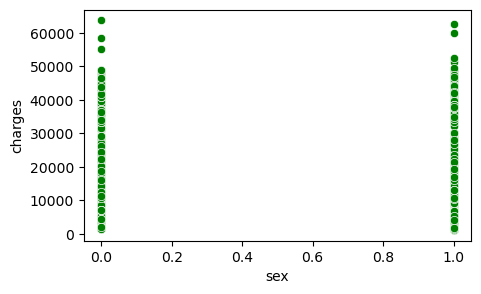

In [54]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=new_data,x='sex',y='charges',color='g')

<Axes: xlabel='bmi', ylabel='charges'>

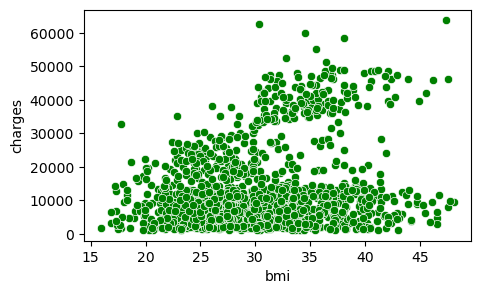

In [53]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=new_data,x='bmi',y='charges',color='g')

<Axes: xlabel='children', ylabel='charges'>

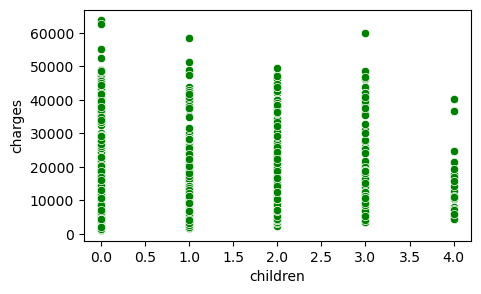

In [56]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=new_data,x='children',y='charges',color='g')

<Axes: xlabel='smoker', ylabel='charges'>

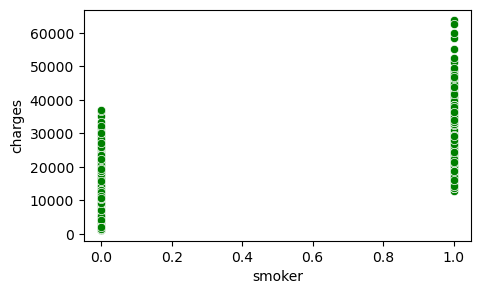

In [57]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=new_data,x='smoker',y='charges',color='g')

<Axes: xlabel='region', ylabel='charges'>

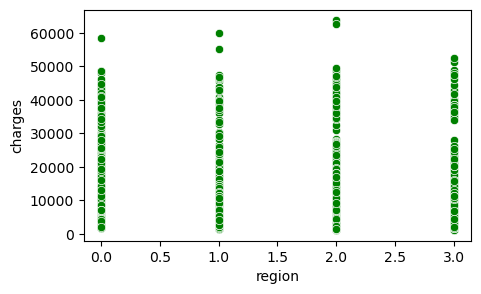

In [58]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=new_data,x='region',y='charges',color='g')

<Figure size 500x300 with 0 Axes>

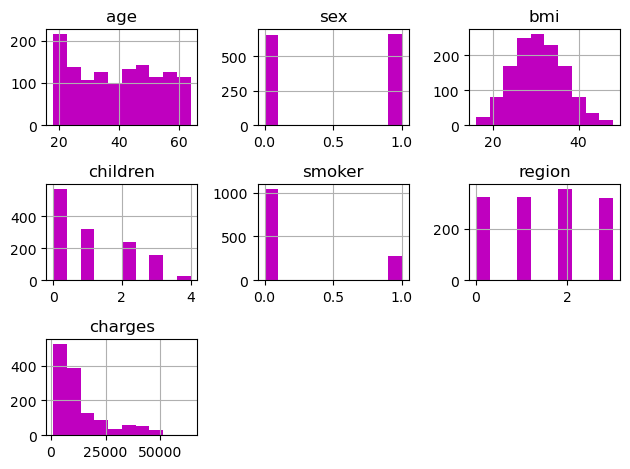

In [73]:
plt.figure(figsize=(5,3))
new_data.hist(color='m')
plt.tight_layout()

#### From the above graphs we can observe that
##### -The analysis reveals a positive correlation between age and the target variable 'charges', indicating that as individuals age, their medical             insurance costs tend to increase
##### -The analysis indicates a positive correlation between BMI and the target variable 'charges', suggesting that higher BMI values are associated            with increased medical insurance costs
##### -The maximum values of charges are observed under the category of no children; after that, 2 or 3 children exhibit higher charges, while lower           charges are observed in the case of 4 and 5 children.
##### -Insurance costs tend to be higher among the population residing in the southwest region.

In [76]:
corr_matrix=new_data.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.016603,0.119151,0.057365,-0.026334,0.004241,0.298840
sex,-0.016603,1.000000,0.039952,0.016028,0.079891,0.006505,0.060014
bmi,0.119151,0.039952,1.000000,0.027712,0.004987,0.159547,0.203264
children,0.057365,0.016028,0.027712,1.000000,0.025060,-0.005156,0.090252
smoker,-0.026334,0.079891,0.004987,0.025060,1.000000,-0.001640,0.786754
region,0.004241,0.006505,0.159547,-0.005156,-0.001640,1.000000,-0.004748
charges,0.298840,0.060014,0.203264,0.090252,0.786754,-0.004748,1.000000


#### Checking The Skewness

In [79]:
new_data.skew()

age         0.048993
sex        -0.010659
bmi         0.193481
children    0.739818
smoker      1.449184
region     -0.025078
charges     1.500552
dtype: float64

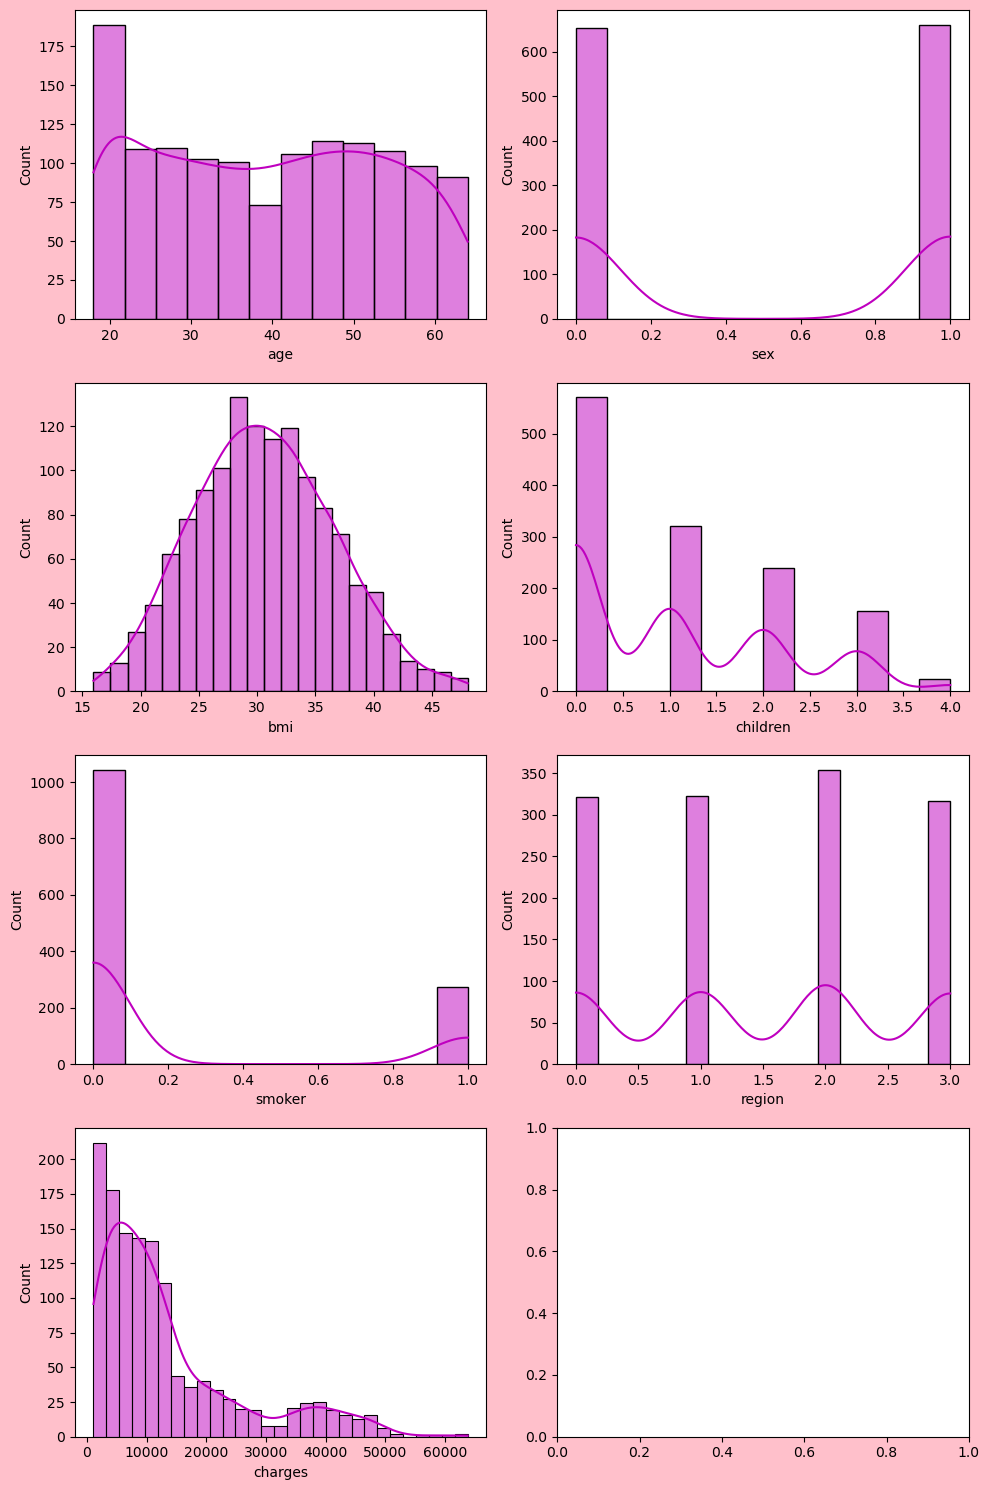

In [180]:
def plot_histograms(data):
    fig,axes=plt.subplots(4,2,figsize=(10,15),facecolor='pink')
    axes=axes.flatten()
    for i,feature in enumerate(new_data.columns[:7]):
        ax=axes[i]
        sns.histplot(data[feature],color='m',kde=True,ax=ax)
        ax.set_label(feature)
    plt.tight_layout()
    plt.show()
plot_histograms(new_data)    

#### Splitting data into training and test

In [90]:
x=new_data.iloc[:,0:-1]
y=new_data.iloc[:,-1]
print('Independent Variable',x.shape)
print('Target Variable',y.shape)

Independent Variable (1315, 6)
Target Variable (1315,)


### Model Selection

In [94]:
from sklearn.model_selection import train_test_split

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=38)

#### LinearRegression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [128]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)
accuracy_lr=r2_score(y_test,pred_lr)
print('Accuracy',accuracy_lr*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lg))
print('Mean Squared Error',mean_squared_error(y_test,pred_lg))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lg)))

Accuracy 80.33321440495584
Mean Absolute Error 3953.126499158045
Mean Squared Error 30126871.828567687
Root Mean Squared Error 5488.795116286241


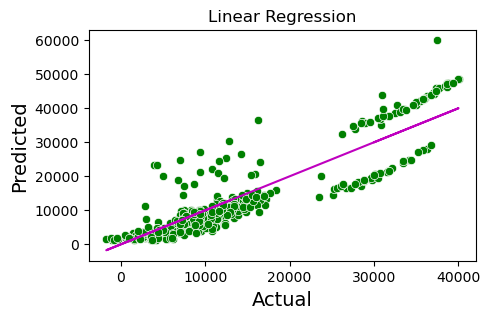

In [137]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_lr,y=y_test,color='g')
plt.plot(pred_lr,pred_lr,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=12)
plt.show()

#### Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_rfr=RFR.predict(x_test)
accuracy_rfr=r2_score(y_test,pred_rfr)
print('R 2 Score',accuracy_rfr*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R 2 Score 87.23295647289243
Mean Absolute Error 2625.1676654797475
Mean Squared Error 19557394.476697695
Root Mean Squared Error 4422.3743030975675


Text(0.5, 1.0, 'Random Forest Regressor')

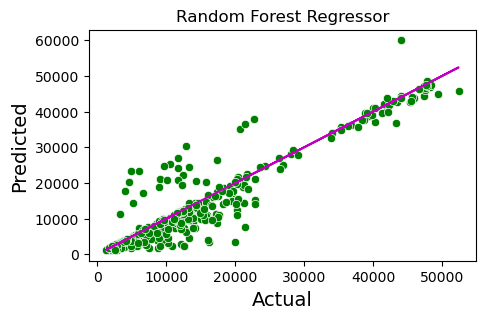

In [152]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_rfr,y=y_test,color='g')
plt.plot(pred_rfr,pred_rfr,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Random Forest Regressor',fontsize=12)

#### Lasso Regressor

In [154]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
accuracy_lg=r2_score(y_test,pred_ls)
print('R2 Score:',accuracy_lg*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 Score: 80.33246263201765
Mean Absolute Error: 3953.450093429944
Mean Squared Error: 30128023.443652064
Root Mean Squared Error: 5488.900021284052


Text(0.5, 1.0, 'Lasso')

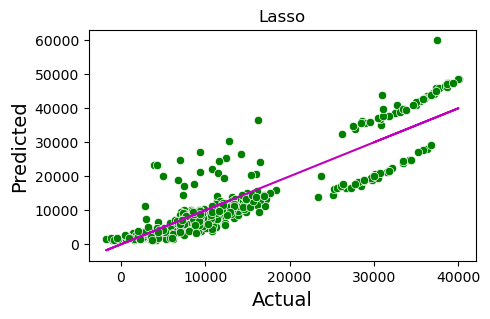

In [158]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_ls,y=y_test,color='g')
plt.plot(pred_ls,pred_ls,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso',fontsize=12)

#### Ridge Regressor

In [150]:
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
accuracy_ls=r2_score(y_test,pred_rg)
print('R2 Score:',accuracy_ls*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rg))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

R2 Score: 80.30529172006189
Mean Absolute Error: 3968.420632207851
Mean Squared Error: 30169645.628324836
Root Mean Squared Error: 5492.690199558395


Text(0.5, 1.0, 'Ridge')

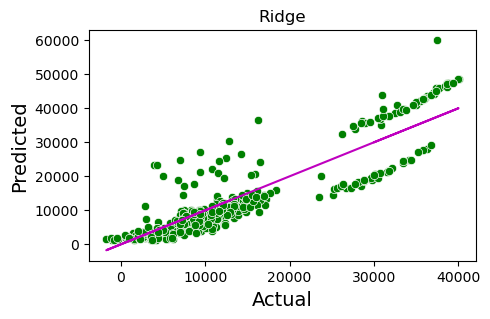

In [157]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_lg,y=y_test,color='g')
plt.plot(pred_lg,pred_lg,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge',fontsize=12)

#### K-Neighbors Regressor

In [147]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
accuracy_knn=r2_score(y_test,pred_knn)
print('R2 Score:',accuracy_knn*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 9.271580256722434
Mean Absolute Error: 8260.089765237974
Mean Squared Error: 138983742.90016124
Root Mean Squared Error: 11789.13664778559


Text(0.5, 1.0, 'KNeighborsRegressor')

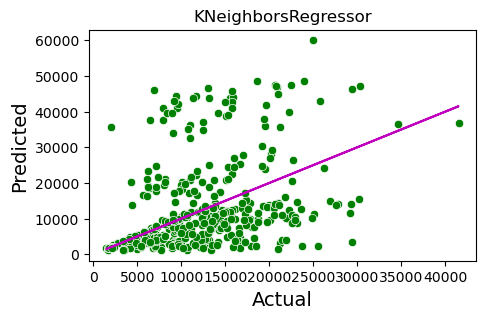

In [155]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_knn,y=y_test,color='g')
plt.plot(pred_knn,pred_knn,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=12)

#### ExtraTreesRegressor

In [162]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
accuracy=r2_score(y_test,pred_etr)
print('R2 Score:',accuracy*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score: 83.86612828144733
Mean Absolute Error: 2830.8625529977217
Mean Squared Error: 24714922.68090178
Root Mean Squared Error: 4971.410532323978


Text(0.5, 1.0, 'ExtraTreesRegressor')

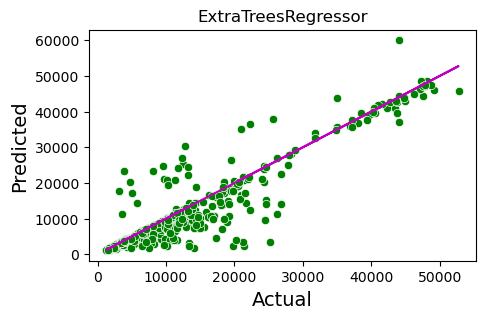

In [163]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_etr,y=y_test,color='g')
plt.plot(pred_etr,pred_etr,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=12)

#### Support Vector Regressor

In [166]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
accuracy_svr=r2_score(y_test,pred_svr)
print('R2 Score:',accuracy_svr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score: -8.939834784380562
Mean Absolute Error: 8415.426266324255
Mean Squared Error: 166881182.67793635
Root Mean Squared Error: 12918.24998511549


Text(0.5, 1.0, 'Support Vector Regressor')

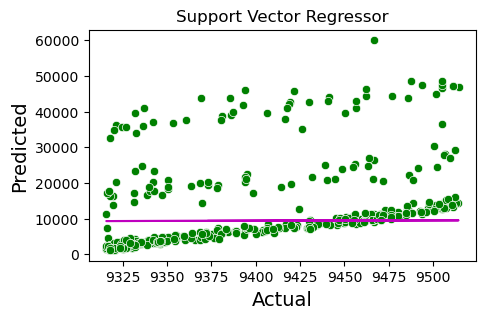

In [165]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_svr,y=y_test,color='g')
plt.plot(pred_svr,pred_svr,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regressor',fontsize=12)

#### Decision Tree Regressor

In [170]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
accuracy_dtr=r2_score(y_test,pred_dtr)
print('R2 Score:',accuracy_dtr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 Score: 73.77361020312338
Mean Absolute Error: 3013.873354453164
Mean Squared Error: 40175303.69251898
Root Mean Squared Error: 6338.399142726733


Text(0.5, 1.0, 'DecisionTreesRegressor')

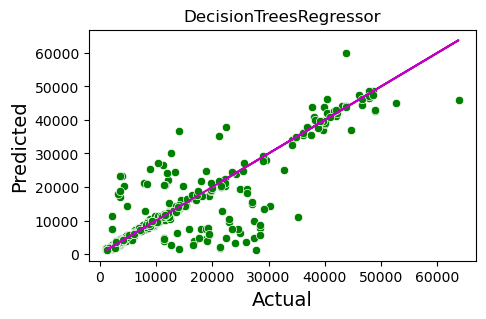

In [171]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_dtr,y=y_test,color='g')
plt.plot(pred_dtr,pred_dtr,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('DecisionTreesRegressor',fontsize=12)

#### GradientBoostingRegressor

In [172]:
from sklearn.ensemble import GradientBoostingRegressor 
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
accuracy_gbr=r2_score(y_test,pred_GBR)
print('R2 Score:',accuracy_gbr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 90.12513387947504
Mean Absolute Error: 2372.9364288504016
Mean Squared Error: 15126967.470082512
Root Mean Squared Error: 3889.3402358346734


Text(0.5, 1.0, 'DecisionTreesRegressor')

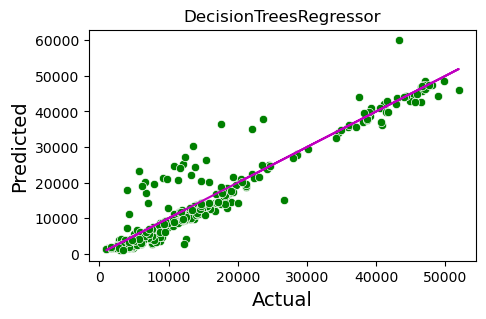

In [173]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_GBR,y=y_test,color='g')
plt.plot(pred_GBR,pred_GBR,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('DecisionTreesRegressor',fontsize=12)

### Cross Validation Score

In [176]:
from sklearn.model_selection import cross_val_score
models=[LR,RFR,ls,rg,knn,etr,svr,dtr,GBR]
for model in models:
    score = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation
    print(model)
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", score.mean())
    print('Difference between accuracy score and cross-validation score is:', (r2_score(y_test, pred) - score.mean()) * 100, '\n')

LinearRegression()
Cross-Validation Scores: [0.76087477 0.71197103 0.77569983 0.7260481  0.76143797]
Mean Cross-Validation Score: 0.7472063409545427
Difference between accuracy score and cross-validation score is: -140.42667039674473 

RandomForestRegressor()
Cross-Validation Scores: [0.8539215  0.77638328 0.85383949 0.82326466 0.85207095]
Mean Cross-Validation Score: 0.8318959758062936
Difference between accuracy score and cross-validation score is: -148.8956338819198 

Lasso()
Cross-Validation Scores: [0.76089814 0.71199571 0.77567601 0.72606237 0.7614317 ]
Mean Cross-Validation Score: 0.7472127854925988
Difference between accuracy score and cross-validation score is: -140.42731485055035 

Ridge()
Cross-Validation Scores: [0.76103477 0.71226691 0.77504764 0.72657187 0.76106759]
Mean Cross-Validation Score: 0.7471977550031523
Difference between accuracy score and cross-validation score is: -140.42581180160568 

KNeighborsRegressor()
Cross-Validation Scores: [0.15408924 0.03717132 0.05

##### Based on these observations, the GradientBoostingRegressor seems to perform relatively well among the models tested, as it has a high mean cross- validation score and a small difference between accuracy score and cross-validation score

### Hyper Paramter Tuning

In [181]:
from sklearn.model_selection import GridSearchCV

In [184]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'random_state':[10,50,100]
}

In [189]:
GCV=GridSearchCV(GBR,param_grid,cv=5)

In [190]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'random_state': [10, 50, 100]})

In [191]:
GCV.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 50}

In [195]:
best_model=GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50, random_state=50)
best_model.fit(x_train,y_train)
pred_gbr=best_model.predict(x_test)
acc=r2_score(y_test,pred_gbr)
print(acc*100)

90.83450954351304


#### By adding parameter my model give 90.83 % accuracy

Text(0.5, 1.0, 'GradientBoostingRegressor')

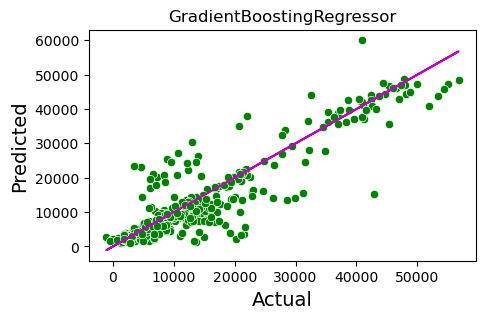

In [210]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_gbr,y=y_test,color='g')
plt.plot(pred_gbr,pred_gbr,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=12)

### Saving the Model

In [240]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Medical Cost Personal Insurance.pkl")

['Medical Cost Personal Insurance.pkl']

In [242]:
#Now loading file and checcking prediction 
model=joblib.load("Medical Cost Personal Insurance.pkl")

In [243]:
prediction=model.predict(x_test)
prediction

array([ 8.38942734e+03,  3.50956905e+03,  2.00249426e+03,  3.42484816e+03,
        1.23550470e+04,  3.21626655e+04,  2.95574213e+03,  2.15327737e+03,
        1.64699781e+03,  1.45986142e+04,  2.25900279e+04,  6.85470370e+03,
        6.29307113e+03,  1.51872381e+03,  1.49197490e+04,  2.33242013e+03,
        9.34166767e+03,  6.46242065e+03,  5.33952926e+04,  4.08382668e+04,
        7.51577723e+03,  3.28063874e+03,  1.20273218e+04,  2.12503336e+03,
        1.05623503e+04,  2.15273827e+04,  5.19392166e+04,  1.50188348e+04,
        7.22773165e+03,  1.53374722e+03,  1.67099889e+04,  1.55134925e+04,
        3.83587132e+04,  8.08086405e+03,  1.37333069e+04,  1.28023490e+04,
        2.20205731e+04,  5.49628450e+03,  1.44238499e+04,  5.67719119e+03,
        1.01974892e+04,  2.92183171e+03,  1.41567487e+04,  1.30008546e+04,
        4.78598254e+04,  1.50348180e+04,  5.17004313e+03,  1.53861746e+04,
        2.48172920e+04,  2.93478732e+04,  1.14039704e+03,  5.06707875e+03,
        1.14540151e+04,  

In [248]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

,Original,prediction
0,10560.49170,8389.427343
1,2867.11960,3509.569052
2,3277.16100,2002.494257
3,4149.73600,3424.848158
4,22192.43711,12355.046964


In [250]:
x_test.head()

,age,sex,bmi,children,smoker,region
775,51,1,33.33,3,0,2
108,29,1,27.94,0,0,2
1261,28,1,37.10,1,0,3
21,30,0,32.40,1,0,3
661,57,0,23.98,1,0,2


In [257]:
#taking some ramdom value for prediction
#sex:-0=female,y=male 
#smoker:-1=yes and 0=no
#Region:-0:-northeast,1=northwest,2=southeast,3=southwest 
sample_data={'age':[20,40,60],'sex':[1,0,1],'bmi':[28,30,60],'children':[1,2,3],'smoker':[0,1,0],'region':[1,2,3]}
sample_df=pd.DataFrame(sample_data)
sample_prediction=best_model.predict(sample_df)
for i, pred in enumerate(sample_prediction):
    print(f"Prediction for sample {i+1}: {pred:.2f}")

Prediction for sample 1: 2391.66
Prediction for sample 2: 22917.09
Prediction for sample 3: 21620.42


##### Conclusively, in the analysis of medical cost personal insurance data, I employed regression techniques within supervised learning, adhering to the exploratory data analysis (EDA) process. This included steps such as removing duplicate records, investigating the relationship between the target variable and independent variables, and visualizing the data through various graphs to discern patterns. Additionally, I addressed skewness and outliers, transformed categorical data into numerical format using encoding methods, and further enhanced model performance through hyperparameter tuning. Ultimately, after splitting the data and evaluating multiple models, gradient boosting emerged as the best-performing model with 91% accuracy . Leveraging this model, I made predictions using sample data, thus culminating in a comprehensive analysis of medical insurance cost prediction